## MMAI869 Dr. Stephen Thomas

### Individual Assignment, Question 7
### Francis Bello
### 20141658

# Yum, Orange Juice!

In [1]:
import datetime
print(datetime.datetime.now())

2019-11-19 20:52:08.123296


#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import uniform

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

#### User-defined functions

In [3]:
def print_scores(model_name, y_test, y_pred):
    print("Model: " + model_name)
    print("========================================================")
    print("*Accuracy score: " + str(accuracy_score(y_test,y_pred)))
    print("--------------------------------------------------------")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print("--------------------------------------------------------")
    print("Precision score: "+ str(precision_score(y_test, y_pred)))
    print("--------------------------------------------------------")
    print("Recall score: " + str(recall_score(y_test, y_pred)))
    print("--------------------------------------------------------")
    print("F1 score: " + str(f1_score(y_test,y_pred)))
    print("--------------------------------------------------------")
    print("Log loss score: " + str(log_loss(y_test,y_pred)))
    print("--------------------------------------------------------")
    print("ROC-AUC score: " + str(roc_auc_score(y_test, y_pred)))
    print("--------------------------------------------------------")
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print("Sensitivity score: " + str(sensitivity))
    print("--------------------------------------------------------")
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print("Specificity score: " + str(specificity))

In [4]:
def plot_roc_auc(y_test,y_pred):        
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc=roc_auc_score(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.8f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()  

#### Read data

In [5]:
df = pd.read_csv("OJ.csv")

#### Inspect data

In [6]:
df.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [7]:
df.shape

(1070, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
Unnamed: 0        1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 158.9+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1070.0,535.500000,309.026698,1.000000,268.250000,535.50,802.750000,1070.000000
WeekofPurchase,1070.0,254.381308,15.558286,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1070.0,3.959813,2.308984,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1070.0,1.867421,0.101970,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1070.0,2.085411,0.134386,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1070.0,0.051860,0.117474,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1070.0,0.123364,0.213834,0.000000,0.000000,0.00,0.230000,0.800000
SpecialCH,1070.0,0.147664,0.354932,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1070.0,0.161682,0.368331,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1070.0,0.565782,0.307843,0.000011,0.325257,0.60,0.850873,0.999947


#### Drop features that serve as identification purposes only, don't contribute to predction

In [10]:
df_clean = df.drop(['Unnamed: 0','WeekofPurchase','STORE','StoreID'], axis=1)
df_clean.head()

,Purchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff
0,CH,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24
1,CH,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24
2,CH,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23
3,MM,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00
4,CH,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00


#### Change string or 1/0 values to Python-accepted values

In [11]:
Store7_dict = {'Yes': True, 'No': False}
SpecialCH_dict = {1: True, 0: False}
SpecialMM_dict = {1: True, 0: False}
df_clean.Store7 = [Store7_dict[item] for item in df_clean.Store7]
df_clean.SpecialCH = [SpecialCH_dict[item] for item in df_clean.SpecialCH]
df_clean.SpecialMM = [SpecialMM_dict[item] for item in df_clean.SpecialMM]
df_clean.head()

,Purchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff
0,CH,1.75,1.99,0.00,0.0,False,False,0.500000,1.99,1.75,0.24,False,0.000000,0.000000,0.24
1,CH,1.75,1.99,0.00,0.3,False,True,0.600000,1.69,1.75,-0.06,False,0.150754,0.000000,0.24
2,CH,1.86,2.09,0.17,0.0,False,False,0.680000,2.09,1.69,0.40,False,0.000000,0.091398,0.23
3,MM,1.69,1.69,0.00,0.0,False,False,0.400000,1.69,1.69,0.00,False,0.000000,0.000000,0.00
4,CH,1.69,1.69,0.00,0.0,False,False,0.956535,1.69,1.69,0.00,True,0.000000,0.000000,0.00


#### Separate predictors from target

In [12]:
X = df_clean.iloc[:,1:] #get independent features
y = df_clean.iloc[:,0] #get target feature

In [13]:
X.head()

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff
0,1.75,1.99,0.00,0.0,False,False,0.500000,1.99,1.75,0.24,False,0.000000,0.000000,0.24
1,1.75,1.99,0.00,0.3,False,True,0.600000,1.69,1.75,-0.06,False,0.150754,0.000000,0.24
2,1.86,2.09,0.17,0.0,False,False,0.680000,2.09,1.69,0.40,False,0.000000,0.091398,0.23
3,1.69,1.69,0.00,0.0,False,False,0.400000,1.69,1.69,0.00,False,0.000000,0.000000,0.00
4,1.69,1.69,0.00,0.0,False,False,0.956535,1.69,1.69,0.00,True,0.000000,0.000000,0.00


In [14]:
y.head()

0    CH
1    CH
2    CH
3    MM
4    CH
Name: Purchase, dtype: object

#### Encode target feature's string values to numeric

In [15]:
le_Purchase = LabelEncoder()

y[:] = le_Purchase.fit_transform(y[:]) # CH => 0, MM => 1
y.head()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    0
1    0
2    0
3    1
4    0
Name: Purchase, dtype: int32

#### Drop calculated-information features

In [16]:
X = X.drop(['PriceDiff','ListPriceDiff'], axis=1)
X.head()

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,Store7,PctDiscMM,PctDiscCH
0,1.75,1.99,0.00,0.0,False,False,0.500000,1.99,1.75,False,0.000000,0.000000
1,1.75,1.99,0.00,0.3,False,True,0.600000,1.69,1.75,False,0.150754,0.000000
2,1.86,2.09,0.17,0.0,False,False,0.680000,2.09,1.69,False,0.000000,0.091398
3,1.69,1.69,0.00,0.0,False,False,0.400000,1.69,1.69,False,0.000000,0.000000
4,1.69,1.69,0.00,0.0,False,False,0.956535,1.69,1.69,True,0.000000,0.000000


#### Check for correlated features

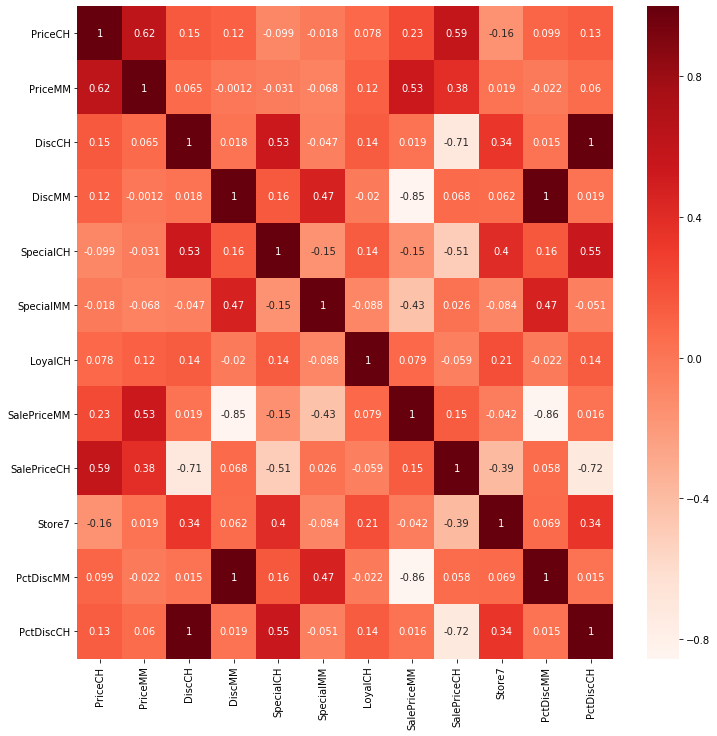

In [17]:
plt.figure(figsize=(12,12))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Check for features importance

In [19]:
n = 12
bestfeatures = SelectKBest(score_func=chi2,k=n)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_) #save scores as pandas dataframe
dfcolumns = pd.DataFrame(X.columns) #save columns as pandas dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

#print all features, ranked from highest to lowest
with pd.option_context('display.max_rows',None, 'display.max_columns',None):
    print(featureScores.nlargest(n,'Score'))

        Feature      Score
6       LoyalCH  73.474324
9        Store7  38.023303
5     SpecialMM  27.402799
4     SpecialCH  16.072116
3        DiscMM  11.039877
2        DiscCH   9.345082
10    PctDiscMM   5.172507
11    PctDiscCH   5.031893
7   SalePriceMM   1.692854
8   SalePriceCH   0.211320
1       PriceMM   0.206022
0       PriceCH   0.003154


In [20]:
bestfeatures = ExtraTreesClassifier()
bestfeatures.fit(X,y)
print(bestfeatures.feature_importances_)

[0.02800074 0.03455771 0.00662119 0.02611937 0.01353585 0.01391939
 0.73209098 0.04612831 0.03217593 0.03459103 0.01632134 0.01593816]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


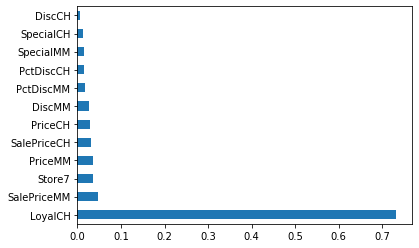

LoyalCH        0.732091
SalePriceMM    0.046128
Store7         0.034591
PriceMM        0.034558
SalePriceCH    0.032176
PriceCH        0.028001
DiscMM         0.026119
PctDiscMM      0.016321
PctDiscCH      0.015938
SpecialMM      0.013919
SpecialCH      0.013536
DiscCH         0.006621
dtype: float64


In [23]:
#plot to visualize
n=15
feat_importances = pd.Series(bestfeatures.feature_importances_,index=X.columns)
feat_importances.nlargest(n).plot(kind='barh')
plt.show()
with pd.option_context('display.max_rows',None, 'display.max_columns',None):
    print(feat_importances.nlargest(n=n, keep = 'first'))

#### Drop a feature that is correlated with another

In [24]:
X = X.drop(['PctDiscMM','PctDiscCH'], axis=1)

#### View final form of data sets

In [25]:
X.head()

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,Store7
0,1.75,1.99,0.00,0.0,False,False,0.500000,1.99,1.75,False
1,1.75,1.99,0.00,0.3,False,True,0.600000,1.69,1.75,False
2,1.86,2.09,0.17,0.0,False,False,0.680000,2.09,1.69,False
3,1.69,1.69,0.00,0.0,False,False,0.400000,1.69,1.69,False
4,1.69,1.69,0.00,0.0,False,False,0.956535,1.69,1.69,True


In [26]:
X.shape

(1070, 10)

In [27]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchase, dtype: int32

In [28]:
y.describe()

count    1070.000000
mean        0.389720
std         0.487915
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchase, dtype: float64

In [29]:
y.shape

(1070,)

#### Copy predictors and target features for use in KFold, Strat KFold, CrossVal, RandomizedSearchCV

In [30]:
#Decision Tree
X_DT_KF, y_DT_KF = X, y
X_DT_SKF, y_DT_SKF = X, y
X_DT_CV, y_DT_CV = X, y

#Random Forest
X_RF_KF, y_RF_KF = X, y
X_RF_SKF, y_RF_SKF = X, y
X_RF_CV, y_RF_CV = X, y

#logistic Regression
X_LR_KF, y_LR_KF = X, y
X_LR_SKF, y_LR_SKF = X, y
X_LR_CV, y_LR_CV = X, y

#Support Vector Machine
X_SVM_KF, y_SVM_KF = X, y
X_SVM_SKF, y_SVM_SKF = X, y
X_SVM_CV, y_SVM_CV = X, y

#XGBoost
X_XGB_KF, y_XGB_KF = X, y
X_XGB_SKF, y_XGB_SKF = X, y
X_XGB_CV, y_XGB_CV = X, y


#RandomizedSearchCV()
X_GSCV_DT, y_GSCV_DT  = X, y
X_GSCV_RF, y_GSCV_RF  = X, y
X_GSCV_LR, y_GSCV_LR  = X, y
X_GSCV_SVM, y_GSCV_SVM  = X, y
X_GSCV_XGB, y_GSCV_XGB  = X, y

#### Split between train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Tree

#### Determine best parameters for a Decision Tree classifier

In [32]:
criterion_options=["gini","entropy"]
splitter_options=["best","random"]
max_features_options=["auto","sqrt","log2"]
min_samples_split_range=list(range(2,5))
min_samples_leaf_range=list(range(1,5))
random_state_range=[42]
min_weight_fraction_leaf_range=[0,0.5]
min_impurity_decrease_range=uniform(0,1)

param_grid = dict(
                    criterion=criterion_options,
                    splitter=splitter_options,
                    max_features=max_features_options,
                    min_samples_split=min_samples_split_range,
                    min_samples_leaf=min_samples_leaf_range,
                    random_state=random_state_range,
                    min_weight_fraction_leaf=min_weight_fraction_leaf_range,
                    min_impurity_decrease=min_impurity_decrease_range
                 )

cross_val = DecisionTreeClassifier()
grid = RandomizedSearchCV(cross_val, param_grid, random_state=42, n_iter=45, cv=10, scoring='accuracy', verbose=0)
%time grid.fit(X_GSCV_DT,y_GSCV_DT)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Wall time: 4.87 s
0.6102803738317757
{'criterion': 'gini', 'max_features': 'auto', 'min_impurity_decrease': 0.1834347898661638, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'random_state': 42, 'splitter': 'best'}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.1834347898661638,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0,
                       presort=False, random_state=42, splitter='best')


#### Create a Decision Tree classifier

In [33]:
model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.1834347898661638,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0,
                       presort=False, random_state=42, splitter='best')

#### Train using K Fold

In [34]:
accuracy_DT_KF=[]
roc_auc_DT_KF=[]

In [35]:
kf_DT = KFold(n_splits=10,random_state=42)

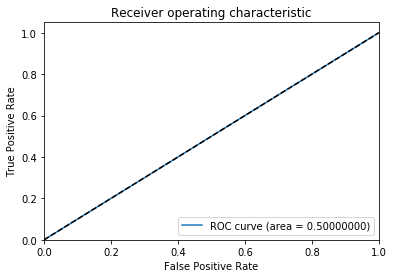

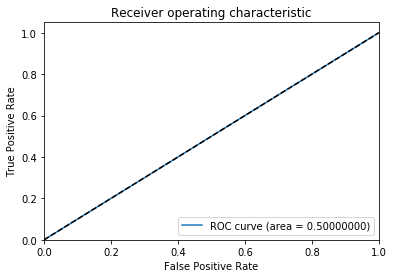

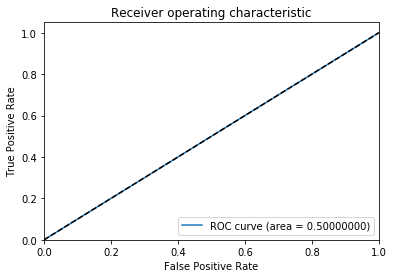

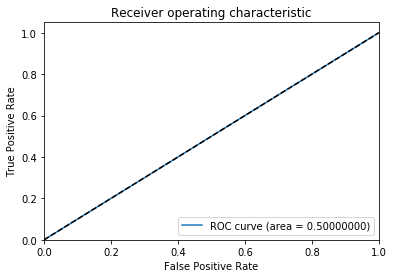

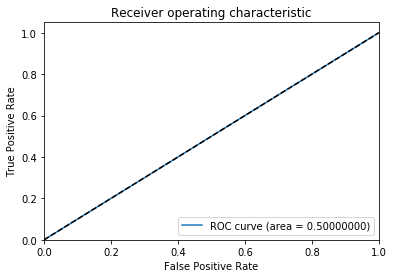

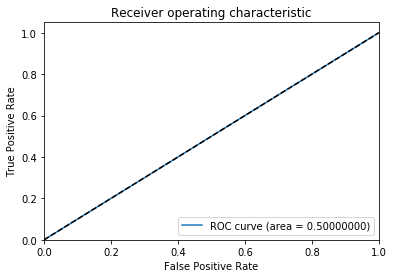

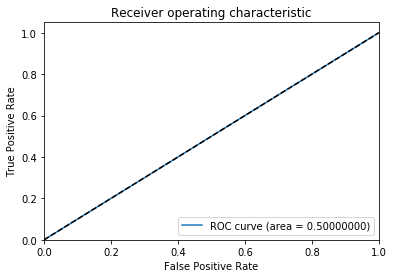

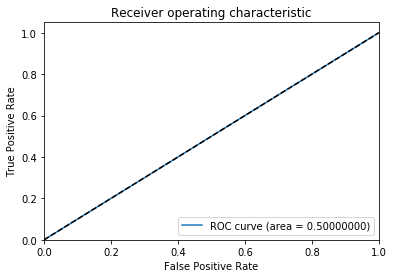

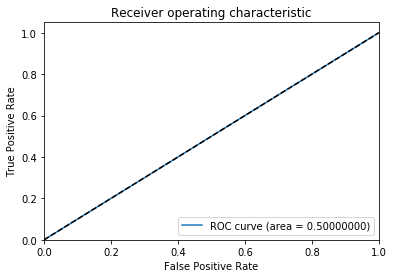

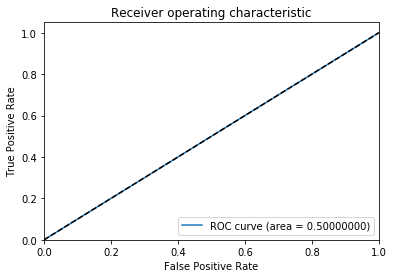

In [36]:
for train_index,test_index in kf_DT.split(X_DT_KF,y_DT_KF):
    X_train_DT_KF,X_test_DT_KF,y_train_DT_KF,y_test_DT_KF = X_DT_KF.iloc[train_index],X_DT_KF.iloc[test_index],y_DT_KF.iloc[train_index],y_DT_KF.iloc[test_index]
    
    model.fit(X_train_DT_KF,y_train_DT_KF)
    y_pred = model.predict(X_test_DT_KF)
    score=accuracy_score(y_pred,y_test_DT_KF)
    accuracy_DT_KF.append(score)
    roc_auc_DT_KF.append(roc_auc_score(y_test_DT_KF,y_pred))
    plot_roc_auc(y_test_DT_KF,y_pred)

#### Train using Stratified K Fold

In [37]:
accuracy_DT_SKF=[]
roc_auc_DT_SKF=[]

In [38]:
skf_DT = StratifiedKFold(n_splits=10,random_state=42)

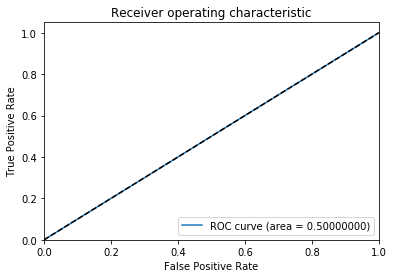

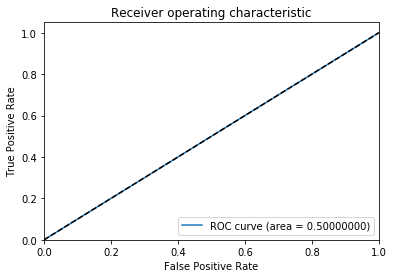

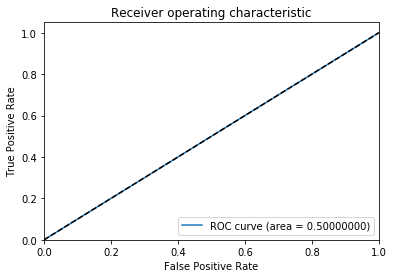

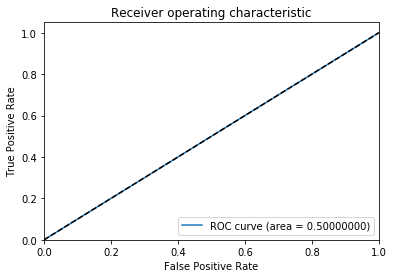

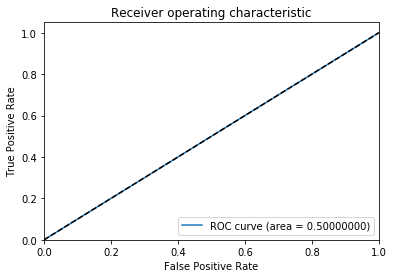

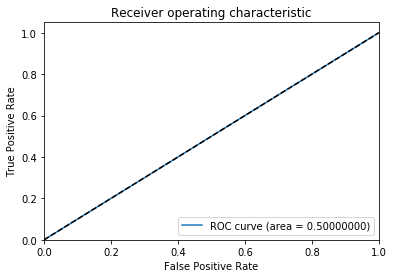

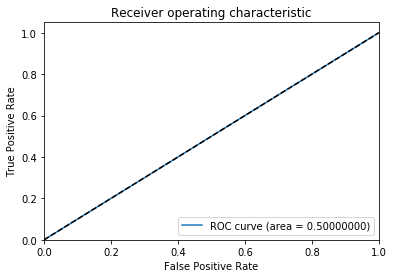

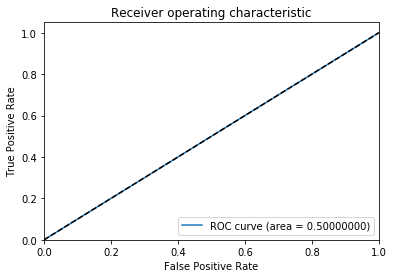

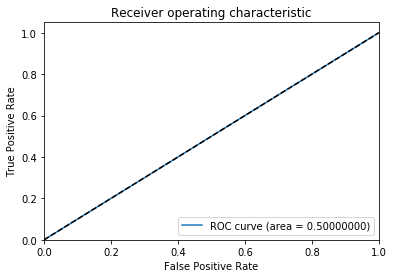

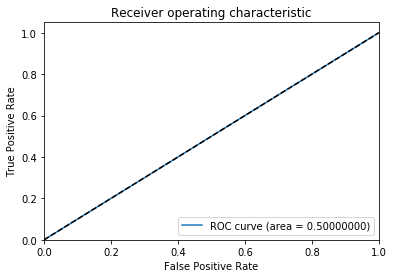

In [39]:
for train_index,test_index in skf_DT.split(X_DT_SKF,y_DT_SKF):
    X_train_DT_SKF,X_test_DT_SKF,y_train_DT_SKF,y_test_DT_SKF = X_DT_SKF.iloc[train_index],X_DT_SKF.iloc[test_index],y_DT_SKF.iloc[train_index],y_DT_SKF.iloc[test_index]
    
    model.fit(X_train_DT_SKF,y_train_DT_SKF)
    y_pred = model.predict(X_test_DT_SKF)
    score=accuracy_score(y_pred,y_test_DT_SKF)
    accuracy_DT_SKF.append(score)
    roc_auc_DT_SKF.append(roc_auc_score(y_test_DT_SKF,y_pred))
    plot_roc_auc(y_test_DT_SKF,y_pred)

#### Train using train_test_split

In [40]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = X_train, X_test, y_train, y_test
model.fit(X_train_DT,y_train_DT) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.1834347898661638,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0,
                       presort=False, random_state=42, splitter='best')

#### Test the classifier

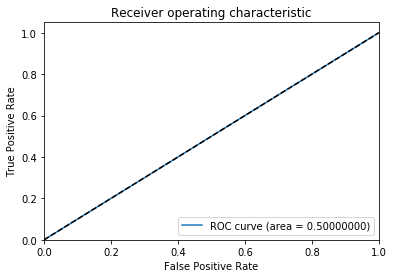

In [41]:
y_pred = model.predict(X_test_DT) 
plot_roc_auc(y_test_DT,y_pred)

#### Evaluate the results

In [42]:
print(np.array(accuracy_DT_KF).mean()) #k fold accuracy

0.6102803738317756


In [43]:
print(np.array(roc_auc_DT_KF).mean()) #k fold roc auc

0.5


In [44]:
print(np.array(accuracy_DT_SKF).mean()) #stratified k fold accuracy

0.6102862516898842


In [45]:
print(np.array(roc_auc_DT_SKF).mean()) #stratified k fold roc auc

0.5


In [46]:
print(accuracy_score(y_pred,y_test_DT)) #train test split

0.6074766355140186


In [47]:
print(np.array(cross_val_score(model,X_DT_CV,y_DT_CV,cv=10)).mean()) #cross val

0.6102862516898842


#### Show other scores from train_test_split()

In [48]:
print_scores(model.__class__.__name__, y_test_DT, y_pred)

Model: DecisionTreeClassifier
*Accuracy score: 0.6074766355140186
--------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       130
           1       0.00      0.00      0.00        84

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214

--------------------------------------------------------
Confusion matrix:
[[130   0]
 [ 84   0]]
--------------------------------------------------------
Precision score: 0.0
--------------------------------------------------------
Recall score: 0.0
--------------------------------------------------------
F1 score: 0.0
--------------------------------------------------------
Log loss score: 13.557276715759333
--------------------------------------------------------
ROC-AUC score: 0.5
-------------------------------------

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2. Random Forest

#### Determine best parameters for a Random Forest classifier

In [49]:
n_estimators_range=list(range(10,20))
criterion_options=["gini","entropy"]
max_features_options=["auto","sqrt","log2"]
max_depth_range=list(range(1,5))
min_samples_split_range=list(range(2,5))
min_samples_leaf_range=list(range(1,5))
min_weight_fraction_leaf_range=[0,0.5]
max_leaf_nodes_range=list(range(2,5))
min_impurity_decrease_range=uniform(0,1)
bootstrap_options=[True,False]
random_state_range=[42]

param_grid = dict(
                    n_estimators=n_estimators_range,
                    criterion=criterion_options,
                    max_features=max_features_options,
                    max_depth=max_depth_range,
                    min_samples_split=min_samples_split_range,
                    min_samples_leaf=min_samples_leaf_range,
                    min_weight_fraction_leaf=min_weight_fraction_leaf_range,
                    max_leaf_nodes=max_leaf_nodes_range,
                    random_state=random_state_range,
                    min_impurity_decrease=min_impurity_decrease_range,
                    bootstrap=bootstrap_options
                    )
                    
cross_val = RandomForestClassifier()
grid = RandomizedSearchCV(cross_val, param_grid, random_state=42, n_iter=45, cv=10, scoring='accuracy', verbose=0)
%time grid.fit(X_GSCV_RF,y_GSCV_RF)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Wall time: 21.1 s
0.8009345794392523
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.06489224710898156, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0, 'n_estimators': 11, 'random_state': 42}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=2,
                       min_impurity_decrease=0.06489224710898156,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0,
                       n_estimators=11, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Create a Random Forest classifier

In [50]:
model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=2,
                       min_impurity_decrease=0.06489224710898156,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0,
                       n_estimators=11, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

#### Train using K Fold

In [51]:
accuracy_RF_KF=[]
roc_auc_RF_KF=[]

In [52]:
kf_RF = KFold(n_splits=10,random_state=42)

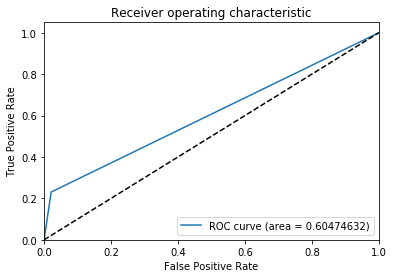

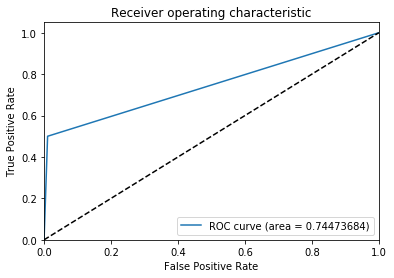

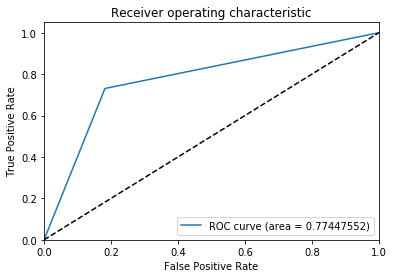

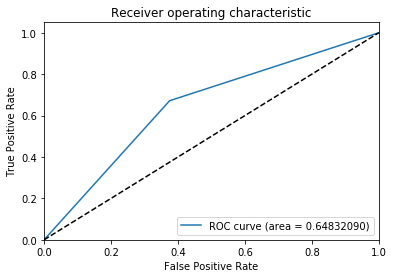

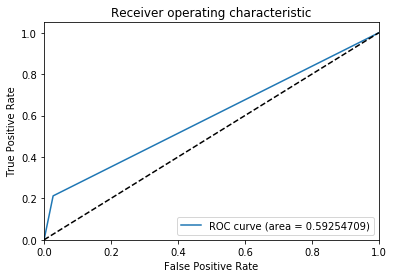

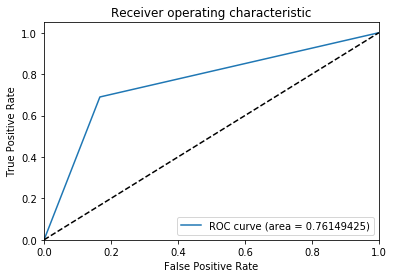

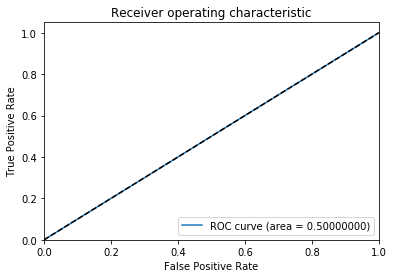

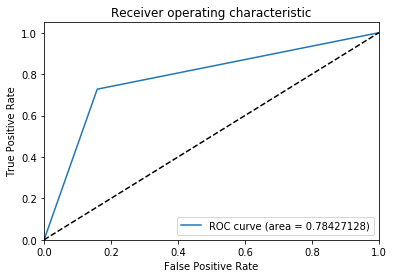

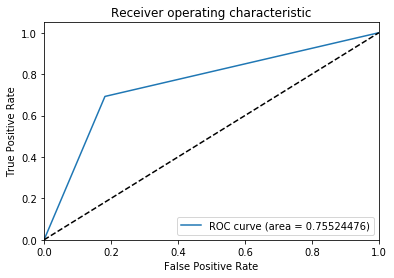

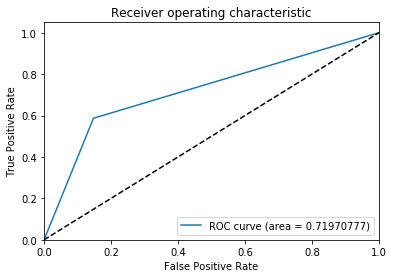

In [53]:
for train_index,test_index in kf_RF.split(X_RF_KF,y_RF_KF):
    X_train_RF_KF,X_test_RF_KF,y_train_RF_KF,y_test_RF_KF = X_RF_KF.iloc[train_index],X_RF_KF.iloc[test_index],y_RF_KF.iloc[train_index],y_RF_KF.iloc[test_index]
    
    model.fit(X_train_RF_KF,y_train_RF_KF)
    y_pred = model.predict(X_test_RF_KF)
    score=accuracy_score(y_pred,y_test_RF_KF)
    accuracy_RF_KF.append(score)
    roc_auc_RF_KF.append(roc_auc_score(y_test_RF_KF,y_pred))
    plot_roc_auc(y_test_RF_KF,y_pred)

#### Train using Stratified K Fold

In [54]:
accuracy_RF_SKF=[]
roc_auc_RF_SKF=[]

In [55]:
skf_RF = StratifiedKFold(n_splits=10,random_state=42)

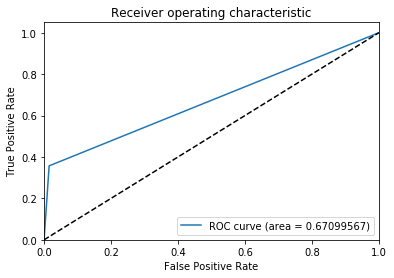

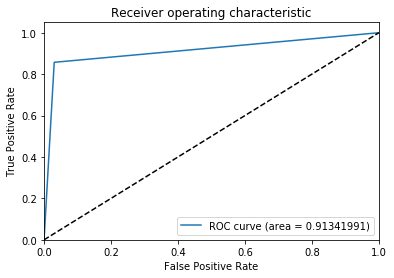

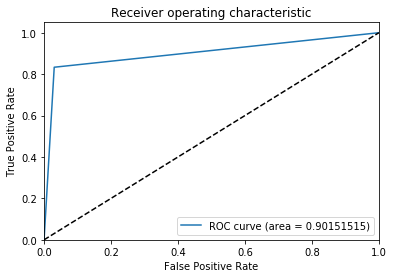

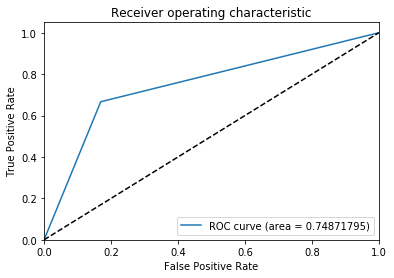

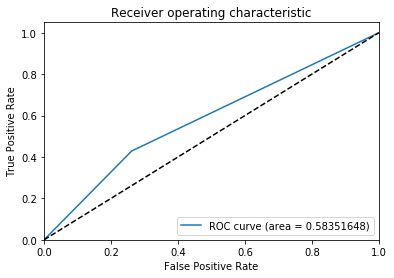

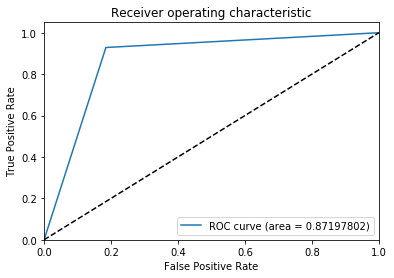

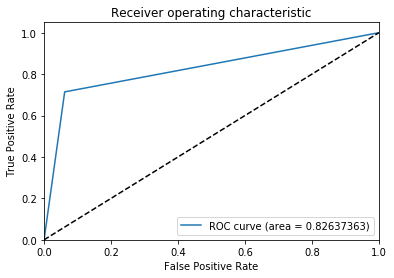

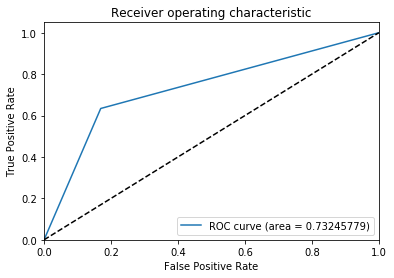

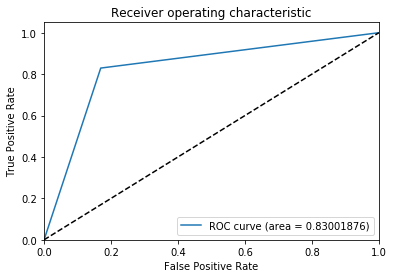

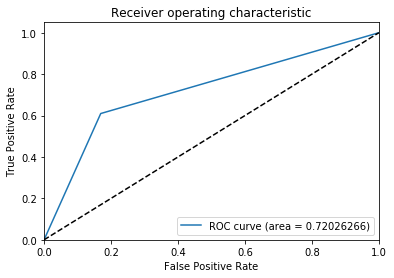

In [56]:
for train_index,test_index in skf_RF.split(X_RF_SKF,y_RF_SKF):
    X_train_RF_SKF,X_test_RF_SKF,y_train_RF_SKF,y_test_RF_SKF = X_RF_SKF.iloc[train_index],X_RF_SKF.iloc[test_index],y_RF_SKF.iloc[train_index],y_RF_SKF.iloc[test_index]
    
    model.fit(X_train_RF_SKF,y_train_RF_SKF)
    y_pred = model.predict(X_test_RF_SKF)
    score=accuracy_score(y_pred,y_test_RF_SKF)
    accuracy_RF_SKF.append(score)
    roc_auc_RF_SKF.append(roc_auc_score(y_test_RF_SKF,y_pred))
    plot_roc_auc(y_test_RF_SKF,y_pred)

#### Train using train_test_split

In [57]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = X_train, X_test, y_train, y_test
model.fit(X_train_RF,y_train_RF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=2,
                       min_impurity_decrease=0.06489224710898156,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0,
                       n_estimators=11, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

#### Test the classifier

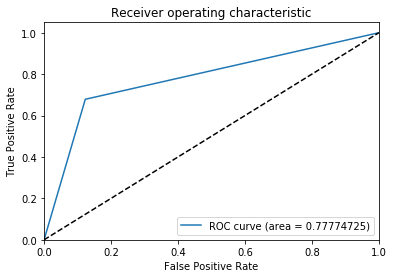

In [58]:
y_pred = model.predict(X_test_RF)
plot_roc_auc(y_test_RF,y_pred)

#### Evaluate the results

In [59]:
print(np.array(accuracy_RF_KF).mean()) #k fold accuracy

0.7429906542056074


In [60]:
print(np.array(roc_auc_RF_KF).mean()) #k fold roc auc

0.6885544733618432


In [61]:
print(np.array(accuracy_RF_SKF).mean()) #stratified k fold accuracy

0.800697995650385


In [62]:
print(np.array(roc_auc_RF_SKF).mean()) #stratified k fold roc auc

0.7799256028524322


In [63]:
print(accuracy_score(y_pred,y_test_RF)) #train test split

0.7990654205607477


In [64]:
print(np.array(cross_val_score(model,X_RF_CV,y_RF_CV,cv=10)).mean()) #cross val

0.800697995650385


#### Show other scores from train_test_split()

In [65]:
print_scores(model.__class__.__name__, y_test_RF, y_pred)

Model: RandomForestClassifier
*Accuracy score: 0.7990654205607477
--------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.78      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214

--------------------------------------------------------
Confusion matrix:
[[114  16]
 [ 27  57]]
--------------------------------------------------------
Precision score: 0.7808219178082192
--------------------------------------------------------
Recall score: 0.6785714285714286
--------------------------------------------------------
F1 score: 0.7261146496815287
--------------------------------------------------------
Log loss score: 6.940094292243188
--------------------------------------------------------
ROC-AUC scor

### 3. Logistic Regression

#### Determine best parameters for a Logistic Regression classifier

In [66]:
tol_range=uniform(0,1)
C_range=uniform(0,10)
fit_intercept_options=[True,False]
solver_options=["liblinear","saga","sag","lbfgs","newton-cg"]
max_iter_range=list(range(100,110))
random_state_range=[42]

param_grid = dict(
                    tol=tol_range,
                    C=C_range,
                    fit_intercept=fit_intercept_options,
                    solver=solver_options,
                    max_iter=max_iter_range,
                    random_state=random_state_range                    
                    )

cross_val = LogisticRegression()
grid = RandomizedSearchCV(cross_val, param_grid, random_state=42, n_iter=45, cv=10, scoring='accuracy', verbose=0)
%time grid.fit(X_GSCV_LR,y_GSCV_LR)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Wall time: 14.9 s
0.8336448598130841
{'C': 8.08397348116461, 'fit_intercept': True, 'max_iter': 109, 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.230893825622149}
LogisticRegression(C=8.08397348116461, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=109, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.230893825622149,
                   verbose=0, warm_start=False)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Create a Logistic Regression classifier

In [67]:
model=LogisticRegression(C=8.08397348116461, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=109, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.230893825622149,
                   verbose=0, warm_start=False)

#### Train using K Fold

In [68]:
accuracy_LR_KF=[]
roc_auc_LR_KF=[]

In [69]:
kf_LR = KFold(n_splits=10,random_state=42)

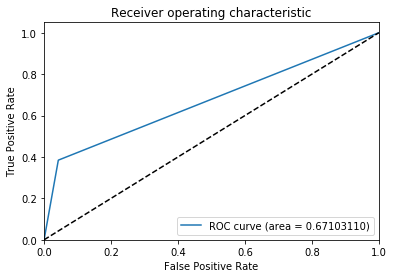

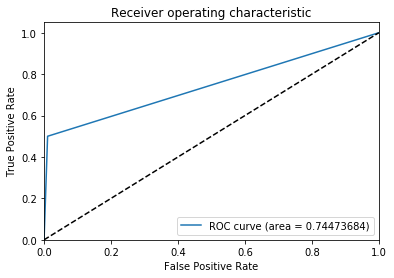

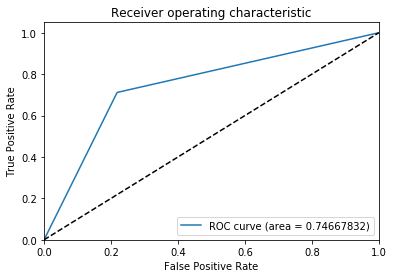

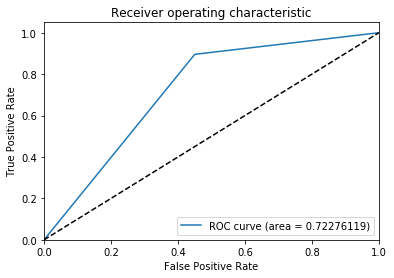

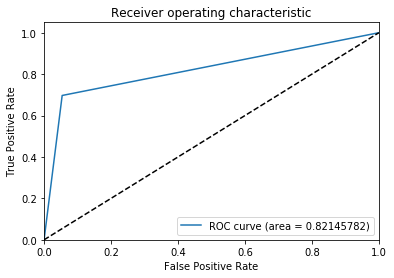

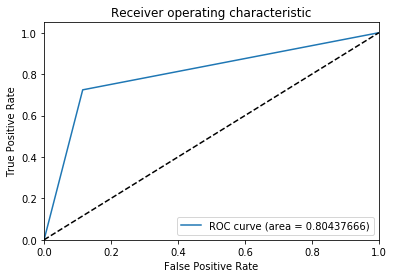

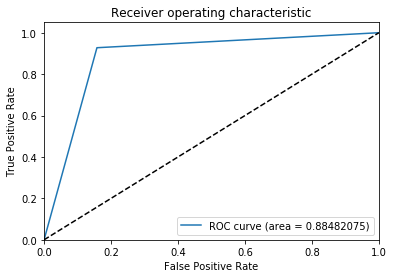

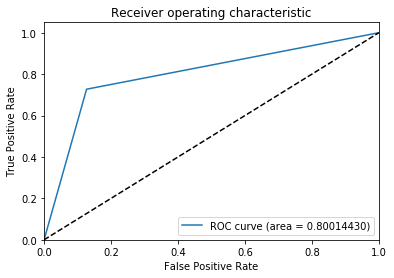

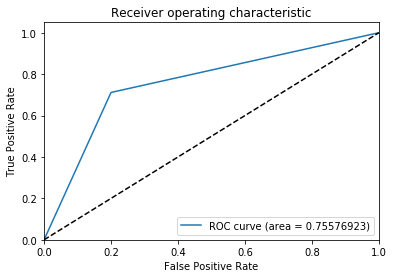

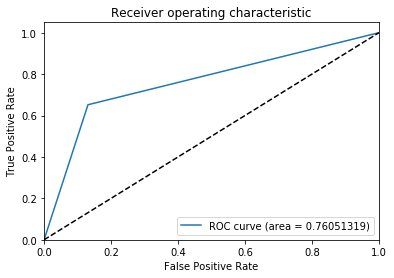

In [70]:
for train_index,test_index in kf_LR.split(X_LR_KF,y_LR_KF):
    X_train_LR_KF,X_test_LR_KF,y_train_LR_KF,y_test_LR_KF = X_LR_KF.iloc[train_index],X_LR_KF.iloc[test_index],y_LR_KF.iloc[train_index],y_LR_KF.iloc[test_index]
    
    model.fit(X_train_LR_KF,y_train_LR_KF)
    y_pred = model.predict(X_test_LR_KF)
    score=accuracy_score(y_pred,y_test_LR_KF)
    accuracy_LR_KF.append(score)
    roc_auc_LR_KF.append(roc_auc_score(y_test_LR_KF,y_pred))
    plot_roc_auc(y_test_LR_KF,y_pred)

#### Train using Stratified K Fold

In [71]:
accuracy_LR_SKF=[]
roc_auc_LR_SKF=[]

In [72]:
skf_LR = StratifiedKFold(n_splits=10,random_state=42)

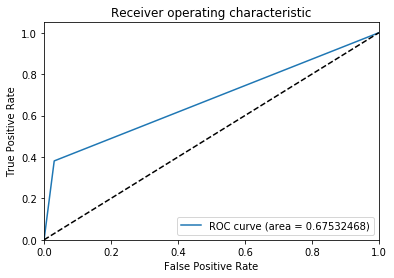

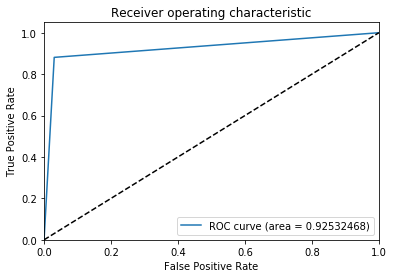

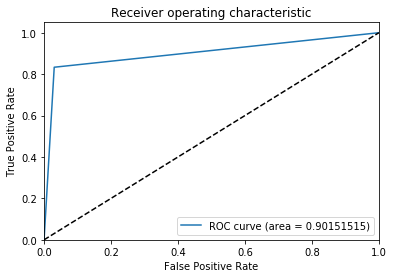

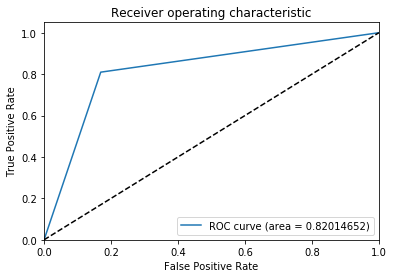

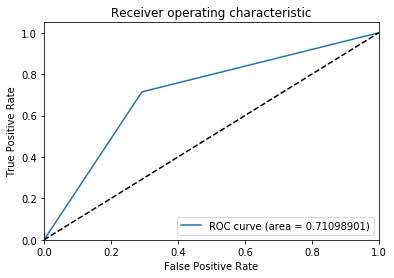

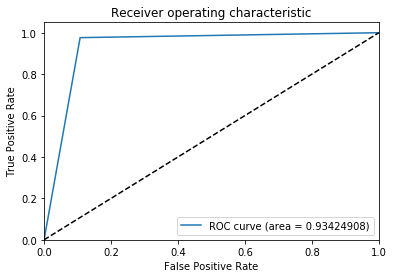

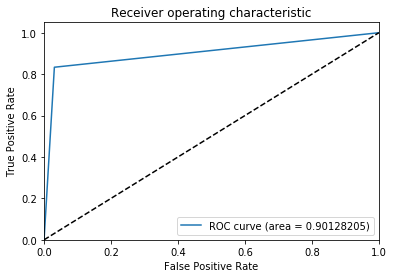

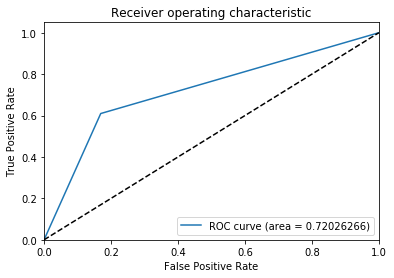

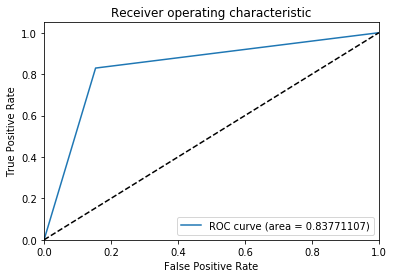

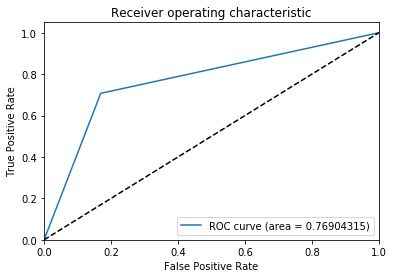

In [73]:
for train_index,test_index in skf_LR.split(X_LR_SKF,y_LR_SKF):
    X_train_LR_SKF,X_test_LR_SKF,y_train_LR_SKF,y_test_LR_SKF = X_LR_SKF.iloc[train_index],X_LR_SKF.iloc[test_index],y_LR_SKF.iloc[train_index],y_LR_SKF.iloc[test_index]
    
    model.fit(X_train_LR_SKF,y_train_LR_SKF)
    y_pred = model.predict(X_test_LR_SKF)
    score=accuracy_score(y_pred,y_test_LR_SKF)
    accuracy_LR_SKF.append(score)
    roc_auc_LR_SKF.append(roc_auc_score(y_test_LR_SKF,y_pred))
    plot_roc_auc(y_test_LR_SKF,y_pred)

#### Train using train_test_split

In [74]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = X_train, X_test, y_train, y_test
model.fit(X_train_LR,y_train_LR)

LogisticRegression(C=8.08397348116461, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=109, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.230893825622149,
                   verbose=0, warm_start=False)

#### Test the classifier

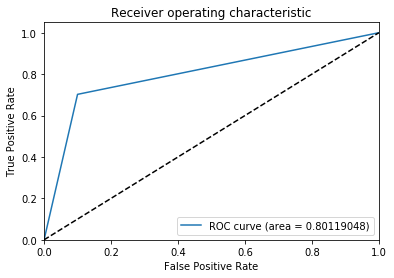

In [75]:
y_pred = model.predict(X_test_LR)
plot_roc_auc(y_test_LR,y_pred)

#### Evaluate the results

In [76]:
print(np.array(accuracy_LR_KF).mean()) #k fold accuract

0.8289719626168225


In [77]:
print(np.array(roc_auc_LR_KF).mean()) #k fold roc auc

0.7712289398123645


In [78]:
print(np.array(accuracy_LR_SKF).mean()) #stratified k fold accuracy

0.8334348896595415


In [79]:
print(np.array(roc_auc_LR_SKF).mean()) #stratified k fold roc auc

0.8195848054384639


In [80]:
print(accuracy_score(y_pred,y_test_LR)) #train test split

0.822429906542056


In [81]:
print(np.array(cross_val_score(model,X_LR_CV,y_LR_CV,cv=10)).mean()) #cross val

0.8334348896595415


#### Show other scores from train_test_split()

In [82]:
print_scores(model.__class__.__name__, y_test_LR, y_pred)

Model: LogisticRegression
*Accuracy score: 0.822429906542056
--------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.82      0.70      0.76        84

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214

--------------------------------------------------------
Confusion matrix:
[[117  13]
 [ 25  59]]
--------------------------------------------------------
Precision score: 0.8194444444444444
--------------------------------------------------------
Recall score: 0.7023809523809523
--------------------------------------------------------
F1 score: 0.7564102564102564
--------------------------------------------------------
Log loss score: 6.133102326042985
--------------------------------------------------------
ROC-AUC score: 0.

### 4. SVM

#### Determine best parameters for a SVM classifier

In [83]:
C_range=uniform(0,1) 
kernel_options=["linear","poly","rbf","sigmoid"]
degree_range=list(range(3,6))
coef0_range=uniform(loc=0,scale=4)
probability_options=[True,False]
shrinking_options=[True,False]
tol_range=uniform(0,1)
decision_function_shape_options=["ovr","ovo"]
random_state=[42]

param_grid = dict(
                    C=C_range,
                    kernel=kernel_options,
                    degree=degree_range,
                    coef0=coef0_range,
                    probability=probability_options,
                    shrinking=shrinking_options,
                    tol=tol_range,
                    decision_function_shape=decision_function_shape_options,
                    random_state=random_state
                    )

cross_val = SVC()
grid = RandomizedSearchCV(cross_val, param_grid, random_state=42, n_iter=45, cv=10, scoring='accuracy', verbose=0)
%time grid.fit(X_GSCV_SVM,y_GSCV_SVM)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Wall time: 1min 6s
0.8345794392523365
{'C': 0.9385527090157502, 'coef0': 0.0031150633640573133, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'linear', 'probability': False, 'random_state': 42, 'shrinking': False, 'tol': 0.5247564316322378}
SVC(C=0.9385527090157502, cache_size=200, class_weight=None,
    coef0=0.0031150633640573133, decision_function_shape='ovo', degree=3,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, probability=False,
    random_state=42, shrinking=False, tol=0.5247564316322378, verbose=False)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Create a SVM classifier

In [84]:
model=SVC(C=0.9385527090157502, cache_size=200, class_weight=None,
    coef0=0.0031150633640573133, decision_function_shape='ovo', degree=3,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, probability=False,
    random_state=42, shrinking=False, tol=0.5247564316322378, verbose=False)

#### Testing using K Fold

In [85]:
accuracy_SVM_KF=[]
roc_auc_SVM_KF=[]

In [86]:
kf_SVM = KFold(n_splits=10,random_state=42)

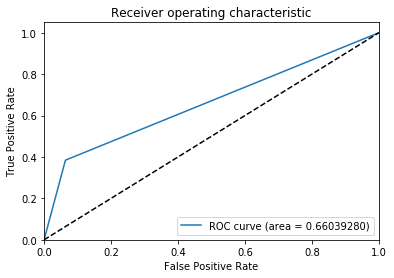

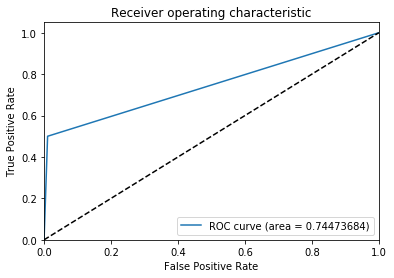

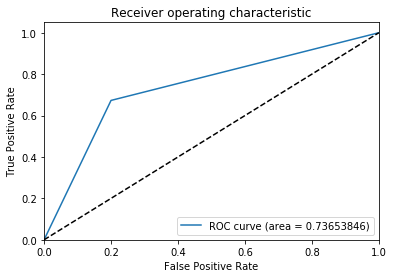

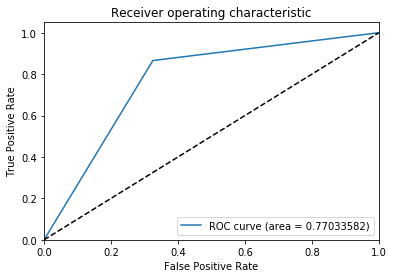

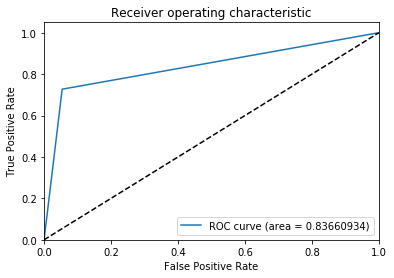

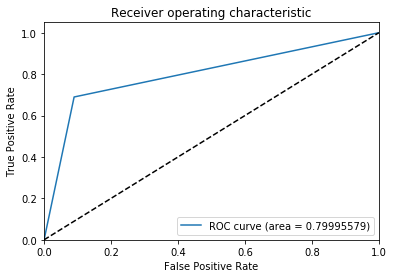

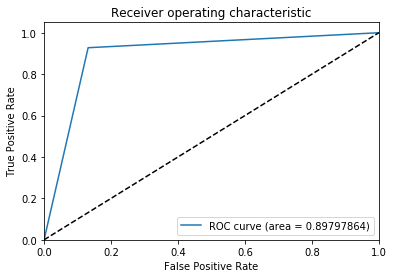

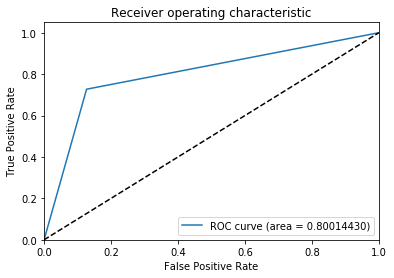

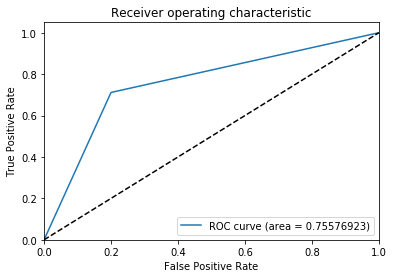

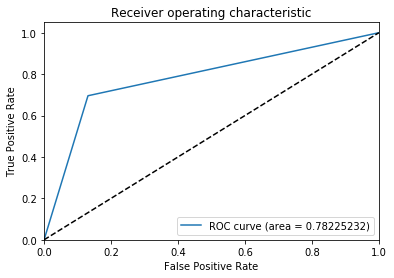

In [87]:
for train_index,test_index in kf_SVM.split(X_SVM_KF,y_SVM_KF):
    X_train_SVM_KF,X_test_SVM_KF,y_train_SVM_KF,y_test_SVM_KF = X_SVM_KF.iloc[train_index],X_SVM_KF.iloc[test_index],y_SVM_KF.iloc[train_index],y_SVM_KF.iloc[test_index]
    
    model.fit(X_train_SVM_KF,y_train_SVM_KF)
    y_pred = model.predict(X_test_SVM_KF)
    score=accuracy_score(y_pred,y_test_SVM_KF)
    accuracy_SVM_KF.append(score)
    roc_auc_SVM_KF.append(roc_auc_score(y_test_SVM_KF,y_pred))
    plot_roc_auc(y_test_SVM_KF,y_pred)

#### Testing using Stratified K Fold

In [88]:
accuracy_SVM_SKF=[]
roc_auc_SVM_SKF=[]

In [89]:
skf_SVM = StratifiedKFold(n_splits=10,random_state=42)

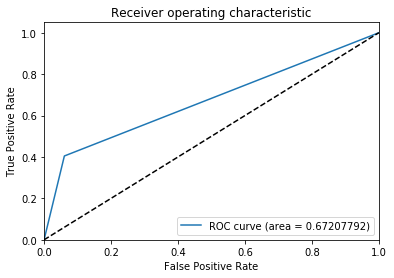

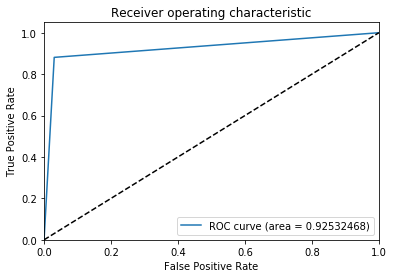

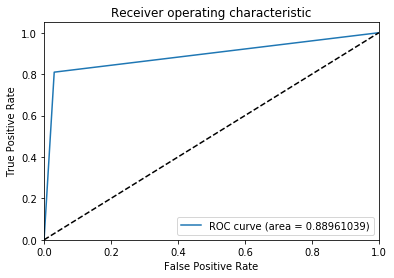

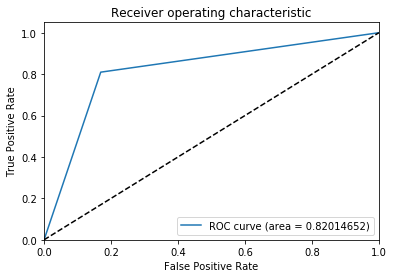

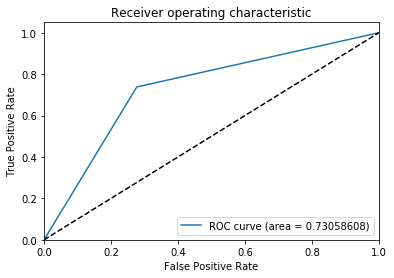

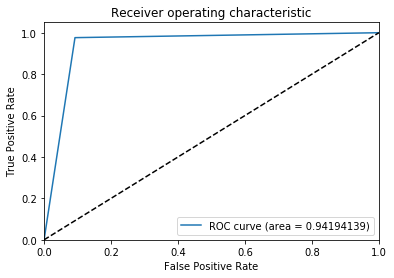

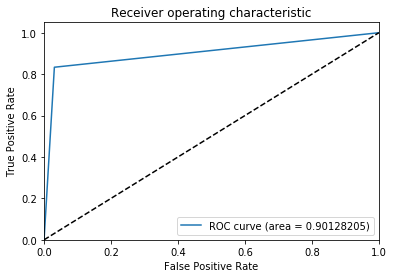

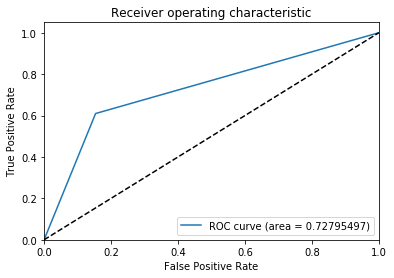

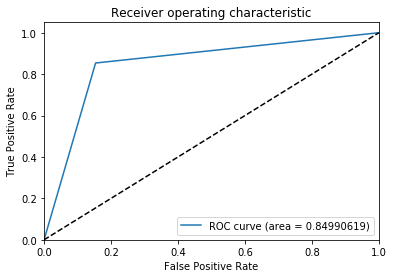

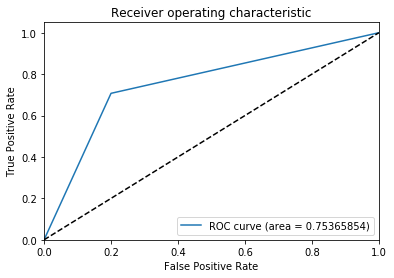

In [90]:
for train_index,test_index in skf_SVM.split(X_SVM_SKF,y_SVM_SKF):
    X_train_SVM_SKF,X_test_SVM_SKF,y_train_SVM_SKF,y_test_SVM_SKF = X_SVM_SKF.iloc[train_index],X_SVM_SKF.iloc[test_index],y_SVM_SKF.iloc[train_index],y_SVM_SKF.iloc[test_index]
    
    model.fit(X_train_SVM_SKF,y_train_SVM_SKF)
    y_pred = model.predict(X_test_SVM_SKF)
    score=accuracy_score(y_pred,y_test_SVM_SKF)
    accuracy_SVM_SKF.append(score)
    roc_auc_SVM_SKF.append(roc_auc_score(y_test_SVM_SKF,y_pred))
    plot_roc_auc(y_test_SVM_SKF,y_pred)

#### Train using train_test_split

In [91]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = X_train, X_test, y_train, y_test
model.fit(X_train_SVM,y_train_SVM)

SVC(C=0.9385527090157502, cache_size=200, class_weight=None,
    coef0=0.0031150633640573133, decision_function_shape='ovo', degree=3,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, probability=False,
    random_state=42, shrinking=False, tol=0.5247564316322378, verbose=False)

#### Test the classifier

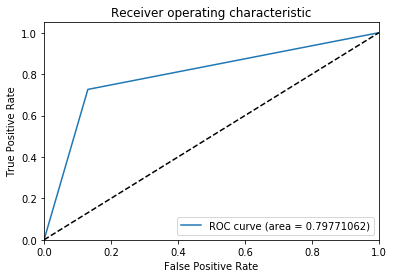

In [92]:
y_pred = model.predict(X_test_SVM)
plot_roc_auc(y_test_SVM,y_pred)

#### Evaluate the results

In [93]:
print(np.array(accuracy_SVM_KF).mean()) #k fold accuracy

0.833644859813084


In [94]:
print(np.array(roc_auc_SVM_KF).mean()) #k fold roc_auc

0.7784713540810424


In [95]:
print(np.array(accuracy_SVM_SKF).mean()) #stratified k fold

0.8343867761254465


In [96]:
print(np.array(roc_auc_SVM_SKF).mean()) #stratified k fold roc_auc

0.8212488730781413


In [97]:
print(accuracy_score(y_pred,y_test_SVM)) #train test split

0.8130841121495327


In [98]:
print(np.array(cross_val_score(model,X_SVM_CV,y_SVM_CV,cv=10)).mean()) #cross val

0.8343867761254465


#### Show other scores from train_test_split

In [99]:
print_scores(model.__class__.__name__, y_test_SVM, y_pred)

Model: SVC
*Accuracy score: 0.8130841121495327
--------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       130
           1       0.78      0.73      0.75        84

    accuracy                           0.81       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

--------------------------------------------------------
Confusion matrix:
[[113  17]
 [ 23  61]]
--------------------------------------------------------
Precision score: 0.782051282051282
--------------------------------------------------------
Recall score: 0.7261904761904762
--------------------------------------------------------
F1 score: 0.7530864197530864
--------------------------------------------------------
Log loss score: 6.455909574545518
--------------------------------------------------------
ROC-AUC score: 0.797710622710622

### 5. XGBoost

#### Determine best parameters for a XGBoost classifier

In [100]:
max_depth_range=list(range(3,10))
learning_rate_range=uniform(0,1)
n_estimators_range=list(range(100,110))
booster_options=["gbtree","gblinear","dart"]
gamma_range=uniform(0,1)
min_child_weight_range=list(range(1,10))
max_delta_step_range=list(range(0,10))
subsample_range=uniform(0,1)
colsample_bytree_range=list(range(0,2))
colsample_bylevel_range=list(range(0,2))
colsample_bynode_range=list(range(0,2))
reg_alpha_range=uniform(0,1)
reg_lambda_range=uniform(0,1)
scale_pos_weight_range=uniform(0,1)
random_state_option=[42]
importance_type_options=["gain","weight","cover","total_gain","total_cover"]


param_grid = dict(
                    max_depth=max_depth_range,
                    learning_rate=learning_rate_range,
                    n_estimators=n_estimators_range,
                    booster=booster_options,
                    gamma=gamma_range,
                    min_child_weight=min_child_weight_range,
                    max_delta_step=max_delta_step_range,
                    subsample=subsample_range,
                    colsample_bytree=colsample_bytree_range,
                    colsample_bylevel=colsample_bylevel_range,
                    colsample_bynode=colsample_bynode_range,
                    reg_alpha=reg_alpha_range,
                    reg_lambda=reg_lambda_range,
                    scale_pos_weight=scale_pos_weight_range,
                    random_state=random_state_option,
                    importance_type=importance_type_options
                    )

cross_val = XGBClassifier()
grid = RandomizedSearchCV(cross_val, param_grid, random_state=42, n_iter=100, cv=10, scoring='accuracy', verbose=0)
%time grid.fit(X_GSCV_XGB,y_GSCV_XGB)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 3min 42s
0.822429906542056
{'booster': 'dart', 'colsample_bylevel': 1, 'colsample_bynode': 0, 'colsample_bytree': 1, 'gamma': 0.512093058299281, 'importance_type': 'cover', 'learning_rate': 0.3486659872917294, 'max_delta_step': 6, 'max_depth': 6, 'min_child_weight': 9, 'n_estimators': 100, 'random_state': 42, 'reg_alpha': 0.3975720210875223, 'reg_lambda': 0.5177513505274801, 'scale_pos_weight': 0.837710105907328, 'subsample': 0.6756901170392807}
XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0, colsample_bytree=1, gamma=0.512093058299281,
              learning_rate=0.3486659872917294, max_delta_step=6, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.3975720210875223, reg_lambda=0.5177513505274801,
              scale_pos_weight=0.837710105907328, seed=None, silent=None,
              s

#### Create a XGBoost classifier

In [101]:
model=XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0, colsample_bytree=1, gamma=0.512093058299281,
              learning_rate=0.3486659872917294, max_delta_step=6, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.3975720210875223, reg_lambda=0.5177513505274801,
              scale_pos_weight=0.837710105907328, seed=None, silent=None,
              subsample=0.6756901170392807, verbosity=1)

#### Testing using K Fold 

In [102]:
accuracy_XGB_KF=[]
roc_auc_XGB_KF=[]

In [103]:
kf_XGB = KFold(n_splits=10,random_state=42)

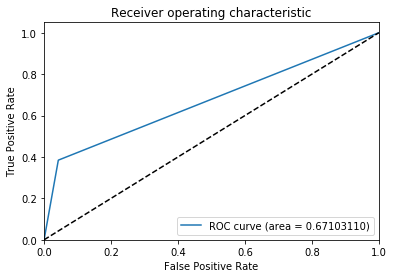

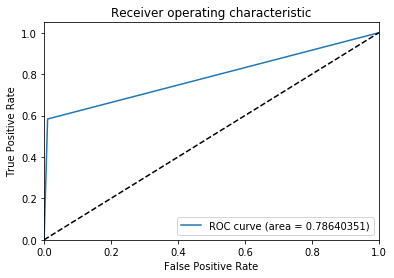

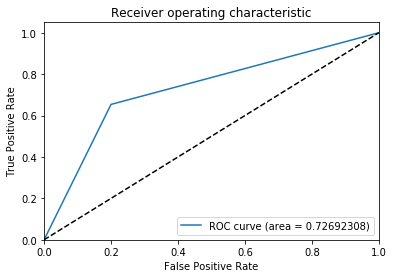

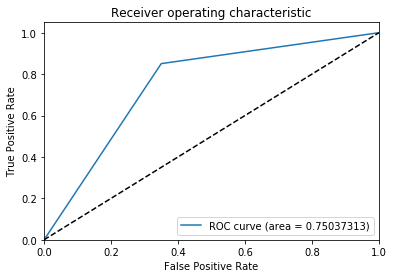

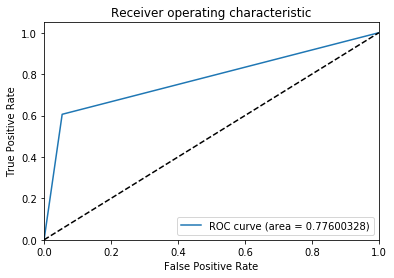

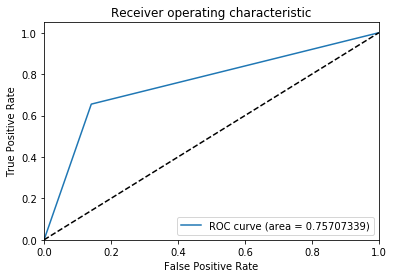

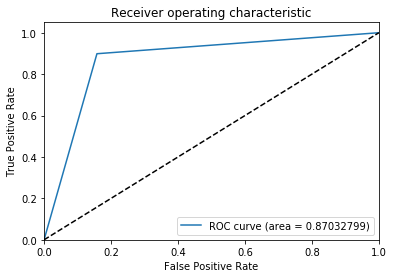

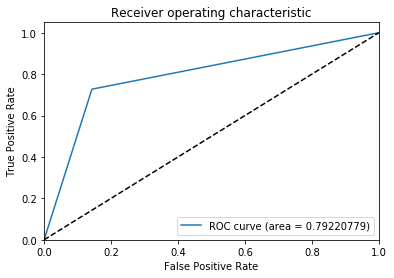

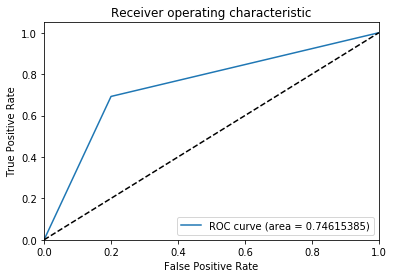

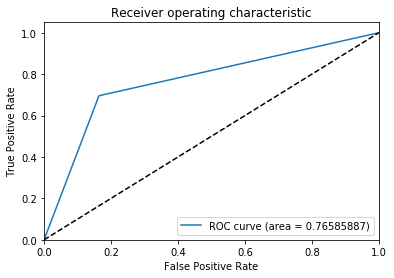

In [104]:
for train_index,test_index in kf_XGB.split(X_XGB_KF,y_XGB_KF):
    X_train_XGB_KF,X_test_XGB_KF,y_train_XGB_KF,y_test_XGB_KF = X_XGB_KF.iloc[train_index],X_XGB_KF.iloc[test_index],y_XGB_KF.iloc[train_index],y_XGB_KF.iloc[test_index]
    
    model.fit(X_train_XGB_KF,y_train_XGB_KF)
    y_pred = model.predict(X_test_XGB_KF)
    score=accuracy_score(y_pred,y_test_XGB_KF)
    accuracy_XGB_KF.append(score)
    roc_auc_XGB_KF.append(roc_auc_score(y_test_XGB_KF,y_pred))
    plot_roc_auc(y_test_XGB_KF,y_pred)

#### Testing using Stratified K Fold

In [105]:
accuracy_XGB_SKF=[]
roc_auc_XGB_SKF=[]

In [106]:
skf_XGB = StratifiedKFold(n_splits=10,random_state=42)

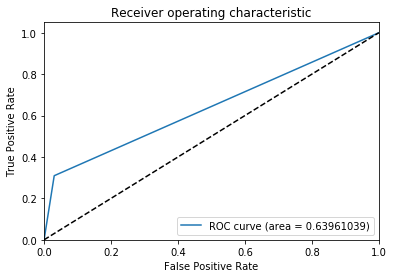

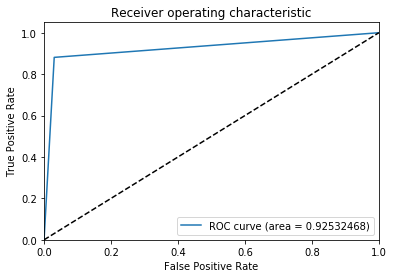

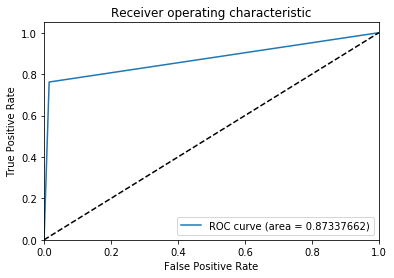

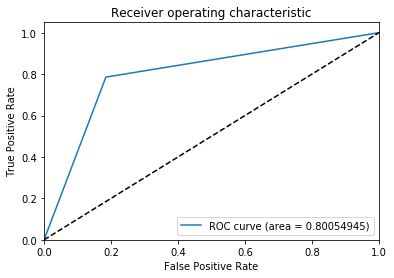

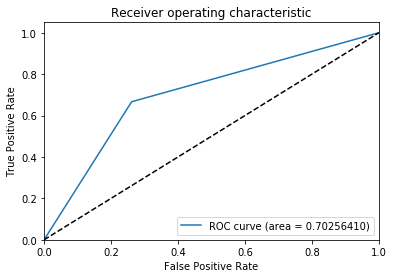

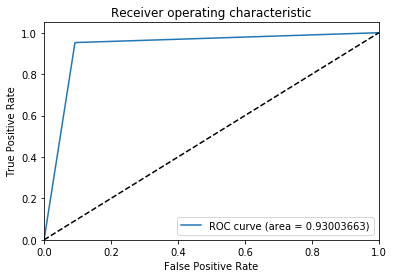

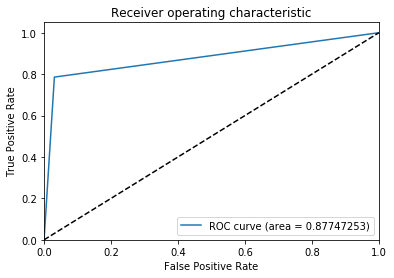

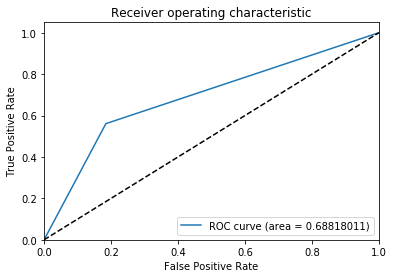

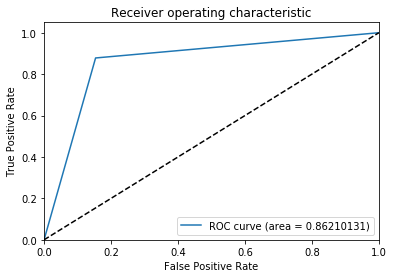

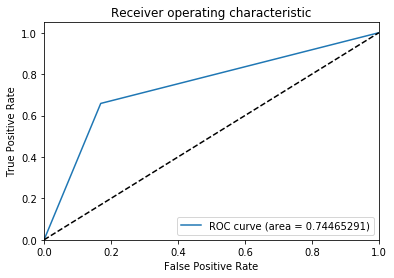

In [107]:
for train_index,test_index in skf_XGB.split(X_XGB_SKF,y_XGB_SKF):
    X_train_XGB_SKF,X_test_XGB_SKF,y_train_XGB_SKF,y_test_XGB_SKF = X_XGB_SKF.iloc[train_index],X_XGB_SKF.iloc[test_index],y_XGB_SKF.iloc[train_index],y_XGB_SKF.iloc[test_index]
    
    model.fit(X_train_XGB_SKF,y_train_XGB_SKF)
    y_pred = model.predict(X_test_XGB_SKF)
    score=accuracy_score(y_pred,y_test_XGB_SKF)
    accuracy_XGB_SKF.append(score)
    roc_auc_XGB_SKF.append(roc_auc_score(y_test_XGB_SKF,y_pred))
    plot_roc_auc(y_test_XGB_SKF,y_pred)

#### Train using train_test_split

In [108]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = X_train, X_test, y_train, y_test
model.fit(X_train_XGB,y_train_XGB)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0, colsample_bytree=1, gamma=0.512093058299281,
              learning_rate=0.3486659872917294, max_delta_step=6, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.3975720210875223, reg_lambda=0.5177513505274801,
              scale_pos_weight=0.837710105907328, seed=None, silent=None,
              subsample=0.6756901170392807, verbosity=1)

#### Test the classifier

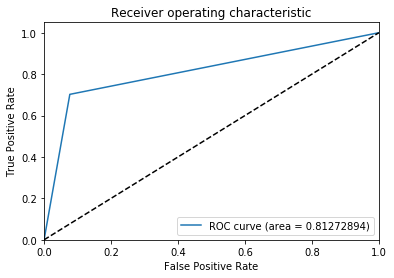

In [109]:
y_pred = model.predict(X_test_XGB)
plot_roc_auc(y_test_XGB,y_pred)

#### Evaluate the results

In [110]:
print(np.array(accuracy_XGB_KF).mean()) #k fold accuracy

0.8186915887850468


In [111]:
print(np.array(roc_auc_XGB_KF).mean()) #k fold roc auc

0.7642355985074578


In [112]:
print(np.array(accuracy_XGB_SKF).mean()) #stratified k fold

0.8222367535936572


In [113]:
print(np.array(roc_auc_XGB_SKF).mean()) #stratified k fold roc auc

0.8043868732893124


In [114]:
print(accuracy_score(y_pred,y_test_XGB)) #train test split

0.8364485981308412


In [115]:
print(np.array(cross_val_score(model,X_XGB_CV,y_XGB_CV,cv=10)).mean()) #cross val

0.8222367535936572


#### Show other scores from train_test_split

In [116]:
print_scores(model.__class__.__name__, y_test_XGB, y_pred)

Model: XGBClassifier
*Accuracy score: 0.8364485981308412
--------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       130
           1       0.86      0.70      0.77        84

    accuracy                           0.84       214
   macro avg       0.84      0.81      0.82       214
weighted avg       0.84      0.84      0.83       214

--------------------------------------------------------
Confusion matrix:
[[120  10]
 [ 25  59]]
--------------------------------------------------------
Precision score: 0.855072463768116
--------------------------------------------------------
Recall score: 0.7023809523809523
--------------------------------------------------------
F1 score: 0.7712418300653594
--------------------------------------------------------
Log loss score: 5.648902662598953
--------------------------------------------------------
ROC-AUC score: 0.81272